In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

In [2]:
train_logs = pd.read_csv("train_logs.csv")
train_logs.head()

for column in ['down_time', 'action_time', 'up_time']:
    train_logs[column] = train_logs[column] / 1000.0

In [3]:
train_scores = pd.read_csv("train_scores.csv")
train_scores.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


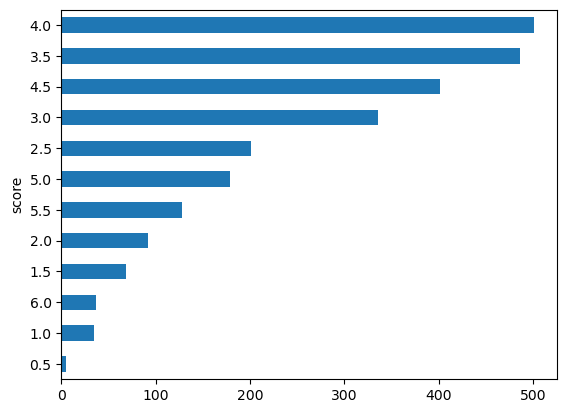

In [4]:
train_scores['score'].value_counts().sort_values().plot(kind='barh')
plt.show()

In [5]:
id0_5 = train_scores[train_scores['score'] == 0.5]['id'].to_list()
id1_0 = train_scores[train_scores['score'] == 1.0]['id'].to_list()
id1_5 = train_scores[train_scores['score'] == 1.5]['id'].to_list()
id2_0 = train_scores[train_scores['score'] == 2.0]['id'].to_list()
id2_5 = train_scores[train_scores['score'] == 2.5]['id'].to_list()
id3_0 = train_scores[train_scores['score'] == 3.0]['id'].to_list()
id3_5 = train_scores[train_scores['score'] == 3.5]['id'].to_list()
id4_0 = train_scores[train_scores['score'] == 4.0]['id'].to_list()
id4_5 = train_scores[train_scores['score'] == 4.5]['id'].to_list()
id5_0 = train_scores[train_scores['score'] == 5.0]['id'].to_list()
id5_5 = train_scores[train_scores['score'] == 5.5]['id'].to_list()
id6_0 = train_scores[train_scores['score'] == 6.0]['id'].to_list()

In [6]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['word_count'].max().mean())

231.4
218.45714285714286
245.85507246376812
237.5108695652174
257.7014925373134
284.44940476190476
345.119341563786
401.5329341317365
481.84328358208955
548.6983240223464
641.1015625
695.7027027027027


In [7]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['event_id'].max().mean())

1571.6
1852.3714285714286
2097.289855072464
1997.9239130434783
2298.9950248756218
2537.8839285714284
3015.9732510288068
3554.7784431137725
4184.850746268657
4727.731843575419
5504.703125
5675.0


In [8]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['activity'].value_counts())

id        activity     
1ebb9b74  Input            1289
          Remove/Cut         93
          Nonproduction      19
315bdafd  Input            1214
          Remove/Cut        130
          Nonproduction      35
3bda31e6  Input            1426
          Remove/Cut        125
          Nonproduction      47
40b28508  Input            1809
          Nonproduction     127
          Remove/Cut         61
c3663a2d  Input            1186
          Nonproduction     270
          Remove/Cut         27
Name: count, dtype: int64


In [9]:
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['activity'].value_counts())

id        activity     
0042269b  Input            3515
          Remove/Cut        439
          Nonproduction     175
          Replace             7
044b274d  Input            4653
                           ... 
f9fd3268  Remove/Cut        870
          Nonproduction     411
fa489e99  Input            8622
          Remove/Cut       1238
          Nonproduction     286
Name: count, Length: 141, dtype: int64


In [10]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['action_time'].sum().mean())

170.0146
195.56257142857143
200.04436231884057
196.7087608695652
229.20283582089553
257.8847797619047
299.99428395061733
354.45059481037924
400.3463407960199
445.52749720670386
532.3988046874999
539.6108918918919


In [11]:
train_logs.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

In [12]:
def classification_score_features_all(df):
    def generate_features(group):
        features = {}
        features['max_word_count'] = group['word_count'].max()
        features['max_event_id'] = group['event_id'].max()
        features['max_up_time'] = group['up_time'].max()
        features['sum_action_time'] = group['action_time'].sum()
        features['max_cursor_position'] = group['cursor_position'].max()
        features['word_per_event'] = features['max_word_count'] / features['max_event_id']
        features['word_per_action_time'] = features['max_word_count'] / features['sum_action_time']
        features['word_per_total_time'] = features['max_word_count'] / features['max_up_time']
        return pd.Series(features)
    return df.groupby('id').apply(generate_features)

feats = pd.DataFrame({'id': train_logs['id'].unique().tolist()})

tmp_df = classification_score_features_all(train_logs)
feats = feats.merge(tmp_df, on='id', how='left')
feats = feats.merge(train_scores, on='id', how='left')
feats.head()

,id,max_word_count,max_event_id,max_up_time,sum_action_time,max_cursor_position,word_per_event,word_per_action_time,word_per_total_time,score
0,001519c8,256.0,2557.0,1801.969,297.243,1539.0,0.100117,0.861248,0.142067,3.5
1,0022f953,323.0,2454.0,1788.969,275.391,1676.0,0.131622,1.172878,0.180551,3.5
2,0042269b,404.0,4136.0,1771.669,421.201,2291.0,0.097679,0.959162,0.228034,6.0
3,0059420b,206.0,1556.0,1404.469,189.596,1047.0,0.132391,1.086521,0.146675,2.0
4,0075873a,252.0,2531.0,1662.472,313.702,1402.0,0.099565,0.803310,0.151582,4.0


In [13]:
def convert_score_to_class(score):
    return int(score / 0.5) - 1

feats['score'] = feats['score'].apply(convert_score_to_class)
feats.head()

,id,max_word_count,max_event_id,max_up_time,sum_action_time,max_cursor_position,word_per_event,word_per_action_time,word_per_total_time,score
0,001519c8,256.0,2557.0,1801.969,297.243,1539.0,0.100117,0.861248,0.142067,6
1,0022f953,323.0,2454.0,1788.969,275.391,1676.0,0.131622,1.172878,0.180551,6
2,0042269b,404.0,4136.0,1771.669,421.201,2291.0,0.097679,0.959162,0.228034,11
3,0059420b,206.0,1556.0,1404.469,189.596,1047.0,0.132391,1.086521,0.146675,3
4,0075873a,252.0,2531.0,1662.472,313.702,1402.0,0.099565,0.803310,0.151582,7


In [14]:
train_feats = feats.copy()
train_feats['score'] = train_feats['score'].astype('category')
target_col = 'score'
drop_cols = 'id'
train_cols = [col for col in train_feats.columns if col not in target_col + drop_cols]
train_feats.head()
train_feats.dtypes
train_feats.shape

(2471, 10)

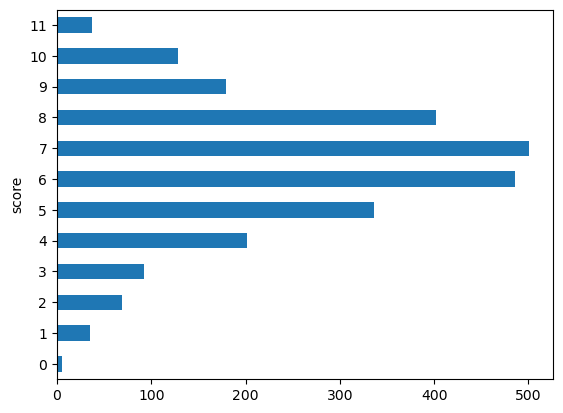

In [15]:
train_feats['score'].value_counts().sort_index().plot(kind="barh")
plt.show()

In [16]:
# EPOCHS = 1
# SPLIT = 10

# model_dict = {}
# scores = []
# preds = np.zeros((len(train_feats), 1))

# # best_params = {
# #     'reg_alpha': 0.6016917340618352, 
# #     'reg_lambda': 3.8071290717767194, 
# #     'colsample_bytree': 0.45216556596658897, 
# #     'subsample': 0.4832292138435902, 
# #     'learning_rate': 0.001,
# #     'num_leaves': 11, 
# #     'max_depth': 27, 
# #     'min_child_samples': 17,
# #     'n_jobs': 4
# # }

# for i in range(EPOCHS):
#     kf = model_selection.KFold(n_splits=SPLIT, random_state=42 + i * 10, shuffle=True)
#     valid_preds = np.zeros(train_feats.shape[0])
    
#     for fold, (train_idx, valid_idx) in enumerate(kf.split(train_feats)):
#         print(f'Epoch: {i + 1} Fold: {fold + 1}')
#         X_train, y_train = train_feats.iloc[train_idx][train_cols], train_feats.iloc[train_idx][target_col]
#         X_valid, y_valid = train_feats.iloc[valid_idx][train_cols], train_feats.iloc[valid_idx][target_col]
#         print(len(np.unique(y_train)))
        
#         params = {
#             "objective": "binary" if len(np.unique(y_train)) == 2 else "multiclass",
#             "metric": "binary_logloss" if len(np.unique(y_train)) == 2 else "multi_logloss",
#             "random_state": 42,
#             "n_estimators": 11_861,
#             "verbosity": -1,
#             # **best_params
#         }

#         model = lgb.LGBMClassifier(**params)
#         early_stopping_callback = lgb.early_stopping(100, verbose=True)
        
#         model.fit(
#             X_train, y_train,
#             eval_set=[(X_valid, y_valid)],
#             callbacks=[early_stopping_callback]
#         )
        
#         valid_predict = model.predict(X_valid)
#         valid_preds[valid_idx] = valid_predict
#         preds[valid_idx, 0] += valid_predict
        
#         score = metrics.accuracy_score(y_valid, valid_predict)
#         model_dict[f'Epoch{i + 1}-Fold{fold + 1}'] = model
        
#     final_score = metrics.accuracy_score(train_feats[target_col], valid_preds)
#     scores.append(final_score)
    
# print("Avg Acc:", np.mean(scores))

# print('metric LGBM = {:.5f}'.format(metrics.accuracy_score(train_feats[target_col], preds[:, 0])))

In [17]:
train_feats['score'] = train_feats['score'].astype(float)
train_feats = train_feats[(train_feats['score'] >= 5) & (train_feats['score'] <= 8)]
train_feats['score'] = train_feats['score'] - 5
train_feats['score'] = train_feats['score'].astype('category')
train_feats.shape

(1725, 10)

In [22]:
X = train_feats[train_cols]
y = train_feats[target_col]
X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
print(X[0])
y = y.to_numpy() if isinstance(y, pd.DataFrame) else y
print(X.shape, y.shape)

y_categorical = to_categorical(y)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = dict(enumerate(class_weights))
print(class_weights)
print(np.unique(y))

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    print(f"Training on fold {fold}...")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]
    
    model = create_model((8,))
    
    model.fit(
        X_train, y_train, 
        # class_weight=class_weights, 
        epochs=200, 
        batch_size=32, 
        validation_data=(X_test, y_test)
    )

[2.56000000e+02 2.55700000e+03 1.80196900e+03 2.97243000e+02
 1.53900000e+03 1.00117325e-01 8.61248204e-01 1.42066817e-01]
(1725, 8) (1725,)
{0: 1.2834821428571428, 1: 0.8873456790123457, 2: 0.8607784431137725, 3: 1.0727611940298507}
[0. 1. 2. 3.]
Training on fold 1...
Epoch 1/200
44/44 [==============================] - 1s 6ms/step - loss: 62.2221 - accuracy: 0.2616 - val_loss: 12.4270 - val_accuracy: 0.3826
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1016 - accuracy: 0.3486 - val_loss: 4.7558 - val_accuracy: 0.4377
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 3.8310 - accuracy: 0.3623 - val_loss: 2.5874 - val_accuracy: 0.3710
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 2.3577 - accuracy: 0.3739 - val_loss: 2.0834 - val_accuracy: 0.3420
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 1.8542 - accuracy: 0.3355 - val_loss: 1.7894 - val_accuracy: 0.3478
Epoch 6/200
44/44 [====

KeyboardInterrupt: 